In [150]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from tqdm import tqdm_notebook
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [101]:
https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=제주도날씨

SyntaxError: invalid syntax (<ipython-input-101-e9b78b94f00b>, line 1)

In [152]:
"""
오늘의 날씨 

----> 서울날씨:30 ℃ 	 구름많음, 어제보다 1˚ 높아요
----> 부산날씨:22 ℃ 	 흐림, 어제보다 4˚ 낮아요
----> 제주도날씨:22 ℃ 	 구름많음, 어제보다 0˚ 높아요
----> 광주날씨:27 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 대전날씨:29 ℃ 	 구름많음, 어제보다 1˚ 낮아요
----> 경기도날씨:29 ℃ 	 구름많음, 어제보다 2˚ 낮아요


"""

'\n오늘의 날씨 \n\n----> 서울날씨:30 ℃ \t 구름많음, 어제보다 1˚ 높아요\n----> 부산날씨:22 ℃ \t 흐림, 어제보다 4˚ 낮아요\n----> 제주도날씨:22 ℃ \t 구름많음, 어제보다 0˚ 높아요\n----> 광주날씨:27 ℃ \t 구름많음, 어제보다 1˚ 낮아요\n----> 대전날씨:29 ℃ \t 구름많음, 어제보다 1˚ 낮아요\n----> 경기도날씨:29 ℃ \t 구름많음, 어제보다 2˚ 낮아요\n\n\n'

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="서울날씨 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'서울날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'서울날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>서울날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211021.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic
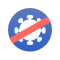
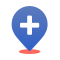
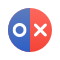
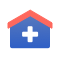

In [153]:
url= 'https://search.naver.com/search.naver?where=nexearch&sm=top_sug.asiw&fbm=0&acr=1&acq=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8&qdt=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
page = urlopen(url)
soup=BeautifulSoup(page,'html.parser')
soup

In [154]:
one=soup.find('div',class_='temperature_text')
one1=one.get_text()

In [155]:
two=soup.find('p',class_='summary')
two1=two.get_text()

In [156]:
print('서울 날씨:', one1, two1)

서울 날씨:  현재 온도7°  어제보다 1° 낮아요  맑음 


In [157]:
type(two1)

str

In [158]:
one2=soup.find('span',class_='weather before_slash')
one2=one.get_text()
one2

' 현재 온도7° '

In [159]:
import xml.etree.ElementTree as elemTree
tree1=elemTree.parse('data/users.xml')
tree1

In [160]:
xmlstr = """<?xml version="1.0" encoding="utf-8" ?>
<users>
    <user grade="gold">
            <name>Kim Cheol Soo</name>
            <age>25</age>
            <birthday>19940215</birthday>
        </user>
    <user grade="diamond">
            <name>Kim Yoo Mee</name>
            <age>21</age>
            <birthday>19980417</birthday>
        </user>
</users>
"""

tree2 = elemTree.fromstring(xmlstr)
tree2

<Element 'users' at 0x000001CD0393A950>

In [161]:
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}"
si_weather = ['서울날씨', '부산날씨', '제주도날씨',
              '광주날씨', '대전날씨', '경기도날씨']

temper = []
word_list = []

for si in tqdm_notebook(si_weather):
    si_encode = urllib.parse.quote_plus(si)
    page = urlopen(url.format(si_encode))
    soup = BeautifulSoup(page, "html.parser")
    
    temper.append(soup.find('div', class_='temperature_text').strong.get_text()[5:])
    word_list.append(soup.find('p', class_='summary').get_text().split())
    
print("오늘의 날씨")
for i in range(len(temper)):
    print("----> " + si_weather[i] + ": " + temper[i] + "C    	 " +
         word_list[i][3] + ", " + word_list[i][0] + " " +
          word_list[i][1] + " " + word_list[i][2])

  0%|          | 0/6 [00:00<?, ?it/s]

오늘의 날씨
----> 서울날씨: 7°C    	 맑음, 어제보다 1° 낮아요
----> 부산날씨: 11°C    	 맑음, 어제보다 2° 높아요
----> 제주도날씨: 9°C    	 맑음, 어제보다 2° 낮아요
----> 광주날씨: 5°C    	 맑음, 어제보다 1° 높아요
----> 대전날씨: 5°C    	 맑음, 어제보다 2° 높아요
----> 경기도날씨: 2°C    	 맑음, 어제보다 2° 낮아요


In [166]:
import xml.etree.ElementTree as elemTree
tree1=elemTree.parse('data/users.xml')
tree1

In [167]:
xmlstr = """<?xml version="1.0" encoding="utf-8" ?>
<users>
    <user grade="gold">
            <name>Kim Cheol Soo</name>
            <age>25</age>
            <birthday>19940215</birthday>
        </user>
    <user grade="diamond">
            <name>Kim Yoo Mee</name>
            <age>21</age>
            <birthday>19980417</birthday>
        </user>
</users>
"""

tree2 = elemTree.fromstring(xmlstr)
tree2

<Element 'users' at 0x000001CD037BD270>

In [168]:
tree1.find('user[1]')

<Element 'user' at 0x000001CD010CD810>

In [169]:
data =tree1.find('user[2]')

In [170]:
dir(data)
data.tag
print(data.attrib)

{'grade': 'diamond'}


In [171]:
data.get('grade')

'diamond'

In [172]:
str = """<?xml version="1.0"?>
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E"/>
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
"""

tree3=elemTree.fromstring(str) # 현재 위치 data

In [173]:
country=tree3.find('./country[@name="Singapore"]')

In [174]:
neighbor=country.find('neighbor')
print(neighbor.get('name'))

Malaysia


In [175]:
import json
j1 = {'name':'츄','birth':'0101','age':20}
j2 = json.dumps(j1,indent=2)
j2

'{\n  "name": "\\uce04",\n  "birth": "0101",\n  "age": 20\n}'

In [176]:
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
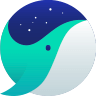
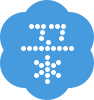

In [177]:
naver = urlopen('http://www.naver.com')
html=naver.read()
html

In [178]:
try:
    google = urlopen('http://www.naver.com')
    html = google.read()
except HTTPError as e:
    print('HTTP Error입니다.:',e)
except URLError as e:
    print('URLError입니다.:',e)
else:
    html = google.read()

In [179]:
from bs4 import BeautifulSoup


In [180]:
page=open('data/test_first.html').read()
page

soup = BeautifulSoup(page,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by Netsong7
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://netsong7.synology.me" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


In [181]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [182]:
soup.find('p',class_='inner-text')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>

In [183]:
soup.find(id='second')

<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>

In [184]:
soup.head

<head>
<title>Very Simple HTML Code by Netsong7</title>
</head>

In [185]:
soup.head.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [186]:
list(soup.children)

['html',
 '\n',
 <html><head>
 <title>Very Simple HTML Code by Netsong7</title>
 </head><body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

In [187]:
soup.head

<head>
<title>Very Simple HTML Code by Netsong7</title>
</head>

In [188]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [189]:
soup.body.div

<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>

In [190]:
soup.body.div.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>

In [191]:
soup.head.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [192]:
soup.body.previous_sibling.nextSibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [193]:
soup.body.div

<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://netsong7.synology.me" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>

In [194]:
soup.html.get_text()

'\nVery Simple HTML Code by Netsong7\n\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n\n'

In [195]:
soup.head.get_text()

'\nVery Simple HTML Code by Netsong7\n'

In [196]:
soup.title.get_text()

'Very Simple HTML Code by Netsong7'

In [197]:
soup.title.get_attribute_list

<bound method Tag.get_attribute_list of <title>Very Simple HTML Code by Netsong7</title>>

In [198]:
soup.p.get_text()

'\n                Happy PinkWink.\n                PinkWink\n'

In [199]:
for p in soup.find_all('p'):
    print(p.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



In [200]:
https://finance.naver.com/marketindex/

SyntaxError: invalid syntax (<ipython-input-200-616c91ccf126>, line 1)

In [201]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/marketindex/'
page=urlopen(url)
page
soup = BeautifulSoup(page,'html.parser')

In [202]:
span = soup.find_all('span',class_='value')
span[0].get_text()

'1,179.50'

In [203]:
div = soup.find_all('div',class_='head_info')
span = div[0].find_all('span')
print('미 환율 : ', span[0].get_text(),'상승 : ',span[3].get_text())

미 환율 :  1,179.50 상승 :   3.50


In [204]:
span = soup.select_one('div.head_info > span.value' )
span.get_text()

'1,179.50'

In [205]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url ='http://www.pythonscraping.com/pages/warandpeace.html'
page = urlopen(url)
soup=BeautifulSoup(page,'html.parser')

In [206]:
span = soup.find_all('span',class_='green')
for spans in span:
    print(spans.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [207]:
head = soup.find_all(['h1','h2','h3'])
for i in head:
    print(i.get_text())

War and Peace
Chapter 1


In [208]:
span = soup.find_all('span',class_=['green','red'])
for i in span:
    print(i.get_text())

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.
Heavens! what a virulent attack!
the prince
Anna Pavlovna
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,
Can one be well while suffering morally? Can one be calm in times
like these if one

In [209]:
url='http://www.pythonscraping.com/pages/page3.html'
page=urlopen(url)
soup=BeautifulSoup(page,'html.parser')
soup

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [210]:
td =soup.find_all('td')
for i in td:
    print(i.get_text())


Vegetable Basket


This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!


$15.00





Russian Nesting Dolls


Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!


$10,000.52





Fish Painting


If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!


$10,005.00





Dead Parrot


This is an ex-parrot! Or maybe he's only resting?


$0.50





Mystery Box


If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!


$1.50






In [211]:
tr = soup.find_all('tr',class_='gift')
for i in tr:
    print(i.get_text())


Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00




Russian Nesting Dolls

Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!

$10,000.52




Fish Painting

If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!

$10,005.00




Dead Parrot

This is an ex-parrot! Or maybe he's only resting?

$0.50




Mystery Box

If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!

$1.50





In [216]:
import bs4
tr=soup.find('table',{'id':'giftList'}).tr.next_siblings
for t in tr:
    if (type(t) == bs4.element.Tag):
        print(t.get_text())


Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00




Russian Nesting Dolls

Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!

$10,000.52




Fish Painting

If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!

$10,005.00




Dead Parrot

This is an ex-parrot! Or maybe he's only resting?

$0.50




Mystery Box

If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!

$1.50





In [214]:
from bs4 import BeautifulSoup
import bs4
tr = soup.find("table", {"id" : "giftList"}).tr.next_siblings

for i in tr:
    if (type(i) == bs4.element.Tag):
        print(i.get_text())
        #(i.img["src"])
        print(list(i.children)[3].img['src'])


Vegetable Basket

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!

$15.00



../img/gifts/img1.jpg

Russian Nesting Dolls

Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!

$10,000.52



../img/gifts/img2.jpg

Fish Painting

If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!

$10,005.00



../img/gifts/img3.jpg

Dead Parrot

This is an ex-parrot! Or maybe he's only resting?

$0.50



../img/gifts/img4.jpg

Mystery Box

If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!

$1.50



../img/gifts/img6.jpg


In [218]:
td1= soup.find_all('td')
print(td1[2].get_text())


$15.00

